In [1]:
import mixsol as mx
import pandas as pd
import seaborn as sns

Decide our stock solutions and intermediate endpoint solutions

In [2]:
stocks = []
for ma in [0,1]:
    for cs in [0, 0.2]:
        fa = 1-ma
        stocks.append(mx.Solution(
                solutes=dict(
                    Cs = cs,
                    MA = ma*(1-cs),
                    FA = fa*(1-cs),
                    Pb=1,
                    I=3*fa,
                    Br=3*ma
                ),
                solvent="DMF9_DMSO1",
                molarity=1.2
            )
        )

Determine list of all `Solutions` that can be accessed in one set of volume transfers from the current stock solutions. This can be useful as an input for an active learning experiment, to ensure that only feasible mixtures are considered as candidates.

In [3]:
mixer = mx.Mixer(
    stock_solutions=stocks,
    targets=None
    )

In [4]:
accessible = mixer.all_possible_solutions(
    min_volume=20,
    target_volume=100,
    precision=2, #volume step size between min_volume and target_volume
    max_inputs=4,
)
print(f"{len(accessible)} unique solutions can be accessed in one step from the current stocks")

1400 unique solutions can be accessed in one step from the current stocks


In [5]:
df = pd.DataFrame(
    [a.solutes for a in accessible]
)# note values will be mol/L of each component

Note some gaps in the accessible solute space. These come from the minimum pipetting volume!

/opt/miniconda3/envs/pascal/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


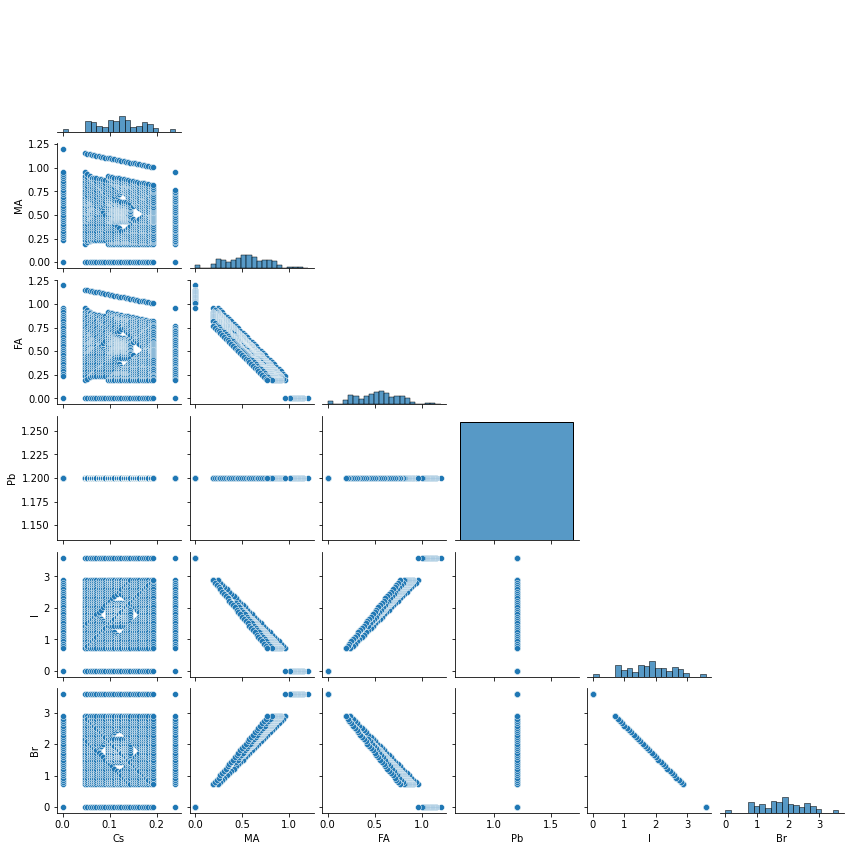

In [6]:
sns.pairplot(
    data=df,
    corner=True,
    size=2
)

We can double check that all of these solutions can be solved for using `Mixer.mix`

In [7]:
mixer.solutions

[<Solution> 1.2M MA_Pb_Br3 in DMF0.9_DMSO0.1,
 <Solution> 1.2M Cs0.2_FA0.8_Pb_I3 in DMF0.9_DMSO0.1,
 <Solution> 1.2M Cs0.2_MA0.8_Pb_Br3 in DMF0.9_DMSO0.1,
 <Solution> 1.2M FA_Pb_I3 in DMF0.9_DMSO0.1]

In [11]:
inaccessible = []

for t in accessible:
    try:
        out = mixer.mix(target=t, volume=100, min_volume=20, max_inputs=4) #will throw Exception is mixture is not possible
    except:
        inaccessible.append(t)

print(f"{len(inaccessible)} solutions were found to be inaccessible")

0 solutions were found to be inaccessible
